In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
import random
import astroML.stats

np.random.seed(42)

In [2]:
cloudy = 0
sunny = 1

p_sc=0.5 #cloudy today sunny tomorrow
p_cc=0.5 #cloudy today cloudy tomorrow
p_cs=0.1 #cloudy tomorrow sunny today
p_ss=0.9 #sunny today sunny tomorrow

In [3]:
weather = [1] #choice of today's weather

N=10000

def weighted_random_choice(choices):
    population, weights = zip(*choices)
    return random.choices(population, weights=weights, k=1)[0]


In [4]:
t=[]
for i in range(1,N):
    if weather[i-1] == 0: #if today is cloudy
        weather.append(weighted_random_choice([(1, p_sc), (0, p_cc)]))
    else: #weather[i-1] == 1: #if today is sunny
        weather.append(weighted_random_choice([(0, p_cs), (1, p_ss)]))
    t.append(np.sum(weather[:i])/i) #compute the fraction of sunny days over days passed till now (i=1, sunny=1)
        
weather = np.array(weather)

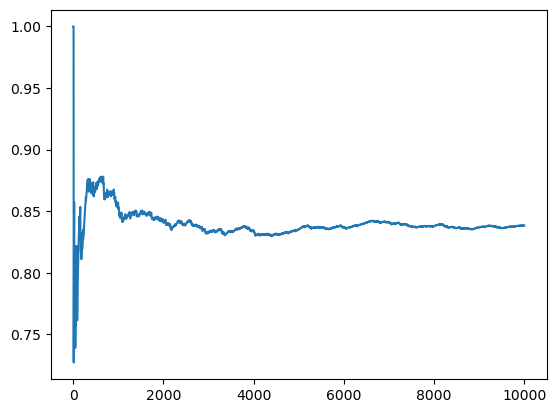

In [5]:
plt.figure(dpi = 100)
plt.plot(t) #same as plotting trace = np.cumsum(weather)/( np.arange(weather.shape[0])+1 )
plt.show()

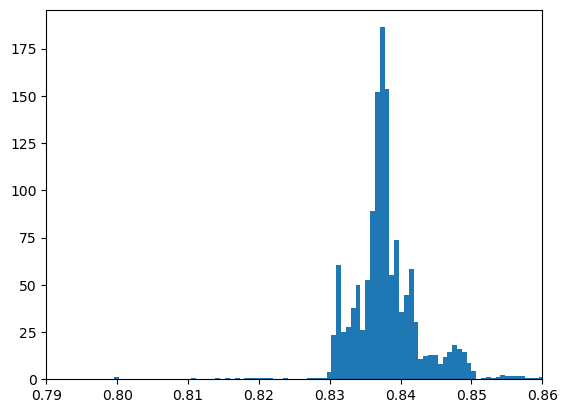

In [6]:
plt.figure(dpi = 100)
plt.xlim(0.79,0.86)
plt.hist(t, bins=400,density=True);

In [7]:
t_median=np.median(t)
trace_mean,trace_sigma= astroML.stats.mean_sigma(t)
print(t_median)
print(trace_mean)
print(trace_sigma)
print(astroML.stats.sigmaG(t))

0.8376402584155049
0.8396079006999208
0.011536436913666301
0.003672652627431847


Now I add a burn-in phase 

In [8]:
burn_in=1800
trace_burn = t[burn_in:]


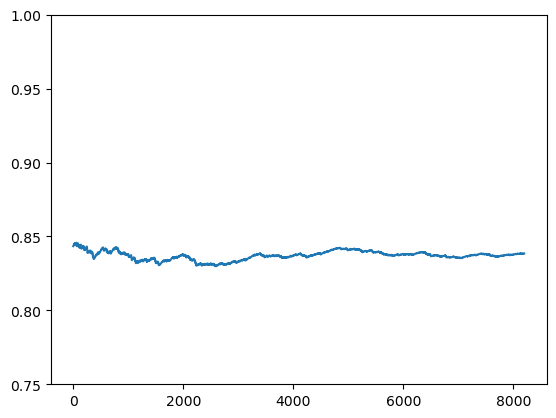

In [9]:
plt.figure(dpi = 100)
plt.ylim(0.75, 1.0) #same limits as above, this is to check if I chose the right burn-in size (from where the trace stabilizes)
plt.plot(trace_burn)

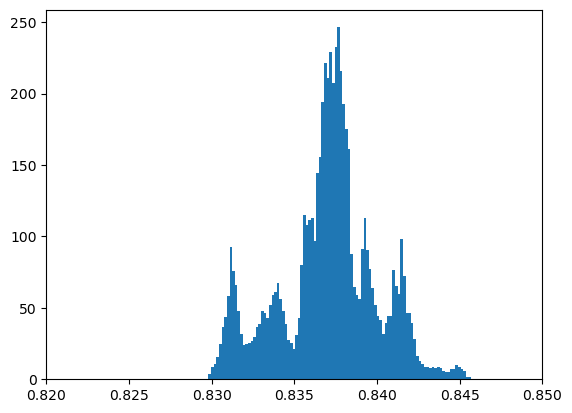

In [10]:
plt.figure(dpi = 100)
plt.xlim(0.82,0.85)
plt.hist(trace_burn, bins=100,density=True);

In [11]:
t_median_b=np.median(trace_burn)
trace_mean_b,trace_sigma_b= astroML.stats.mean_sigma(trace_burn)
print(t_median_b)
print(trace_mean_b)
print(trace_sigma_b)
print(astroML.stats.sigmaG(trace_burn))

0.8372591006423983
0.8370503120034846
0.002965211442478028
0.002196337636619922


Applying a correct burn-in period makes the samples more representative, which can make the sample standard deviation and $\sigma_{G}$ more comparable if the underlying distribution is approximately normal. 

**Now the same with the stock market**

In [12]:
bull = 0
bear = 1
stagnant = 2

transition_matrix = [
    [0.9, 0.075, 0.025],  # Bull market transitions
    [0.15, 0.8, 0.05],    # Bear market transitions
    [0.25, 0.25, 0.5]     # Stagnant market transitions
]

choice = bull
current_state = choice

N = 10000

In [13]:
market_states = [current_state]
t = []

def weighted_random_choice(choices, weights):
    return random.choices(choices, weights=weights, k=1)[0]

for i in range(1, N):
    current_state = market_states[-1]
    next_state = weighted_random_choice([bull, bear, stagnant], transition_matrix[current_state])
    market_states.append(next_state)
    t.append(np.sum(np.array(market_states[:i]) == choice) / i)  # Fraction of Bull market days

market_states = np.array(market_states)

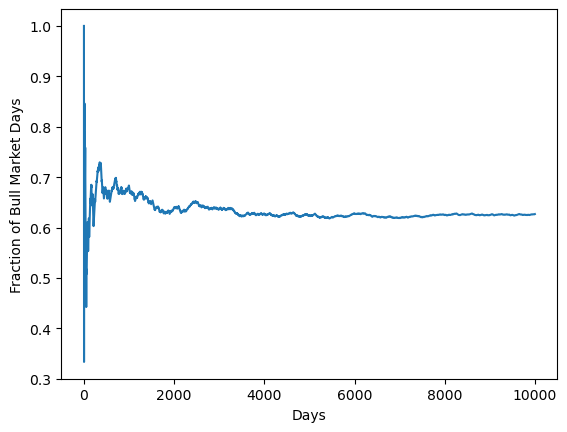

In [14]:
choice=('Bull' if choice==0 else 'Bear' if choice==1 else 'Stagnant')
plt.figure(dpi=100)
plt.plot(t)
plt.xlabel("Days")
plt.ylabel("Fraction of {} Market Days".format(choice))
plt.show()

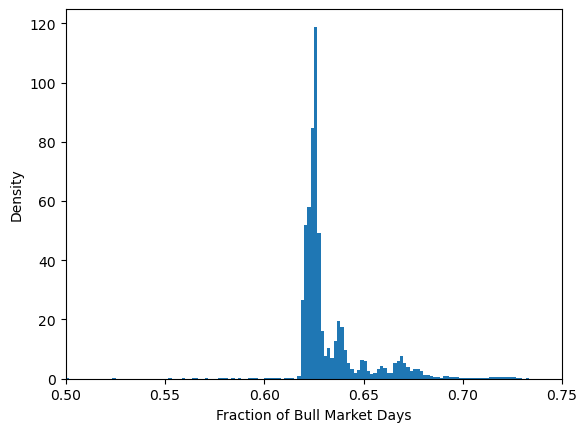

In [15]:
# Plotting the histogram of the fraction of Bull market days
plt.figure(dpi=100)
plt.hist(t, bins=400, density=True)
plt.xlim(0.5, 0.75)
plt.xlabel("Fraction of Bull Market Days")
plt.ylabel("Density")
plt.show()

In [16]:
t_median = np.median(t)
trace_mean, trace_sigma = astroML.stats.mean_sigma(t)
print(t_median)
print(trace_mean)
print(trace_sigma)
print(astroML.stats.sigmaG(t))

0.6258657599798514
0.632824660445918
0.020930576739449303
0.009747935898122891
